In [1]:
import tensorflow as tf 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [2]:
# first ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset from seaborn library
dataset = sb.load_dataset('tips')

In [4]:
print(dataset)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [5]:
# concert the text data into the form that machine can understand like true and false
tips = pd.get_dummies(dataset, drop_first=True)# it can convert text data which ml cant understand like the smoker yes, no , which day, like sun, mon ml cant understand so it convert this categorical text data into the true, false

In [6]:
print(tips)

     total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0         16.99  1.01     2        True       True    False    False     True   
1         10.34  1.66     3       False       True    False    False     True   
2         21.01  3.50     3       False       True    False    False     True   
3         23.68  3.31     2       False       True    False    False     True   
4         24.59  3.61     4        True       True    False    False     True   
..          ...   ...   ...         ...        ...      ...      ...      ...   
239       29.03  5.92     3       False       True    False     True    False   
240       27.18  2.00     2        True      False    False     True    False   
241       22.67  2.00     2       False      False    False     True    False   
242       17.82  1.75     2       False       True    False     True    False   
243       18.78  3.00     2        True       True    False    False    False   

     time_Dinner  
0       

In [7]:
# set the data of X and y where X is the dataset which model can learn other data and from y model check this personality gives how much tip during forward and backword propogation during the model training
X = tips.drop('tip', axis=1)
y = tips['tip']

In [8]:
print(X)

     total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0         16.99     2        True       True    False    False     True   
1         10.34     3       False       True    False    False     True   
2         21.01     3       False       True    False    False     True   
3         23.68     2       False       True    False    False     True   
4         24.59     4        True       True    False    False     True   
..          ...   ...         ...        ...      ...      ...      ...   
239       29.03     3       False       True    False     True    False   
240       27.18     2        True      False    False     True    False   
241       22.67     2       False      False    False     True    False   
242       17.82     2       False       True    False     True    False   
243       18.78     2        True       True    False    False    False   

     time_Dinner  
0           True  
1           True  
2           True  
3           True  
4   

In [9]:
# split the data into the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [10]:
print(X_train)

     total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
63        18.29     4       False      False    False     True    False   
54        25.56     4       False       True    False    False     True   
107       25.21     2       False      False    False     True    False   
50        12.54     2       False       True    False    False     True   
230       24.01     4       False      False    False     True    False   
174       16.82     2       False      False    False    False     True   
212       48.33     4       False       True    False     True    False   
189       23.10     3       False      False    False    False     True   
240       27.18     2        True      False    False     True    False   
215       12.90     2        True      False    False     True    False   
169       10.63     2        True      False    False     True    False   
58        11.24     2       False      False    False     True    False   
48        28.55     3    

In [11]:
print(y_test)

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
       ... 
72     3.14
232    3.39
134    3.25
199    2.00
224    1.58
Name: tip, Length: 196, dtype: float64


CHANGE THE DATA INTO THE BINARY FORM

In [13]:
# Normalize the data into the high features to low fatures
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)# convert the data into the form data machich can understand (0,1) encode, fit_transform learn how to transform the data
X_test = scaler.transform(X_test)# transform uses the previous form to transform the data mean = 0 and std = 1

# Note we just convert the X data of train and test because y data is already in numeric form (tip) data

In [15]:
print(X_train)

[[-0.30145699  1.67134792 -0.91986621 -1.04257207 -0.20851441  1.13389342
  -0.67419986  0.48038446]
 [ 0.54180097  1.67134792 -0.91986621  0.9591663  -0.20851441 -0.8819171
   1.4832397   0.48038446]
 [ 0.50120396 -0.72341925 -0.91986621 -1.04257207 -0.20851441  1.13389342
  -0.67419986  0.48038446]
 [-0.96840792 -0.72341925 -0.91986621  0.9591663  -0.20851441 -0.8819171
   1.4832397   0.48038446]
 [ 0.3620142   1.67134792 -0.91986621 -1.04257207 -0.20851441  1.13389342
  -0.67419986  0.48038446]
 [-0.47196444 -0.72341925 -0.91986621 -1.04257207 -0.20851441 -0.8819171
   1.4832397   0.48038446]
 [ 3.18292665  1.67134792 -0.91986621  0.9591663  -0.20851441  1.13389342
  -0.67419986  0.48038446]
 [ 0.25646196  0.47396433 -0.91986621 -1.04257207 -0.20851441 -0.8819171
   1.4832397   0.48038446]
 [ 0.72970715 -0.72341925  1.08711461 -1.04257207 -0.20851441  1.13389342
  -0.67419986  0.48038446]
 [-0.92665099 -0.72341925  1.08711461 -1.04257207 -0.20851441  1.13389342
  -0.67419986  0.4803

In [16]:
print(X_test)

[[-0.12399004 -0.72341925 -0.91986621 ...  1.13389342 -0.67419986
   0.48038446]
 [-1.40569574 -0.72341925 -0.91986621 ... -0.8819171   1.4832397
   0.48038446]
 [ 0.42464959  1.67134792 -0.91986621 ... -0.8819171   1.4832397
   0.48038446]
 ...
 [-0.30493673 -0.72341925  1.08711461 ... -0.8819171  -0.67419986
  -2.081666  ]
 [-0.8558962  -0.72341925 -0.91986621 ... -0.8819171  -0.67419986
  -2.081666  ]
 [-0.86633543 -0.72341925 -0.91986621 ... -0.8819171  -0.67419986
  -2.081666  ]]


In [ ]:
X_train.shape[1]

(48, 8)

In [19]:
# Build the model layers Mlps Multilayer preception 
inner_layer = tf.keras.layers.Dense(64, activation='relu', input_shape = (X_train.shape[1],))
hidden_layer = tf.keras.layers.Dense(32, activation='relu')
output_layer = tf.keras.layers.Dense(1) # output layer for regression problem

In [20]:
# Rap this layers in a model
model = tf.keras.models.Sequential([inner_layer,
                                    hidden_layer,
                                    output_layer])

In [21]:
# setings the rule how to train the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae']) # optimizer is tells that how to optimize the model means how to upgrade the model weights, loss tells that from which thing is reduce during the traing time , metrics tells that, metrics is used to tell the model how we want measure the accuracy of the model

IT IS THE ADDITIONAL STEP TO STOP THE MODEL TRAINING IF THE WEIGHTS ARE NOT UPDATE AFTER SOME STEPS THEN WE STOPS THE MODEL TRAINING

In [22]:
from keras.callbacks import EarlyStopping

stop = EarlyStopping(patience=10) # it tells the model during the training time if our model is not rduce their loss or increase the accuracy then stops the treaining after 10 steps 

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[stop])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: 9.4022 - mae: 2.7480 - val_loss: 8.3502 - val_mae: 2.6022
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.9800 - mae: 2.6520 - val_loss: 7.6763 - val_mae: 2.4722
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.0329 - mae: 2.4802 - val_loss: 7.0379 - val_mae: 2.3420
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.0114 - mae: 2.4170 - val_loss: 6.4322 - val_mae: 2.2107
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.6096 - mae: 2.3595 - val_loss: 5.8649 - val_mae: 2.0796
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.3795 - mae: 2.1114 - val_loss: 5.3324 - val_mae: 1.9491
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.6728 - mae: 1.9682 - val_loss: 4.8280 - val_mae: 1.8194
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.1911 - mae: 1.9945 - val_loss: 4.3531 - val_mae: 1.6916
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5.2536 - mae: 1.8233 -

In [24]:
# check accuracy
loss, how_far_prediction = model.evaluate(X_test, y_test, verbose = 1)
print("this is the loss of model", loss)
print("this is the method to check how much your model answer is near to test data", how_far_prediction)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3059 - mae: 0.9198
this is the loss of model 1.2199355363845825
this is the method to check how much your model answer is near to test data 0.8716260194778442


In [25]:
print(model)

<Sequential name=sequential, built=True>


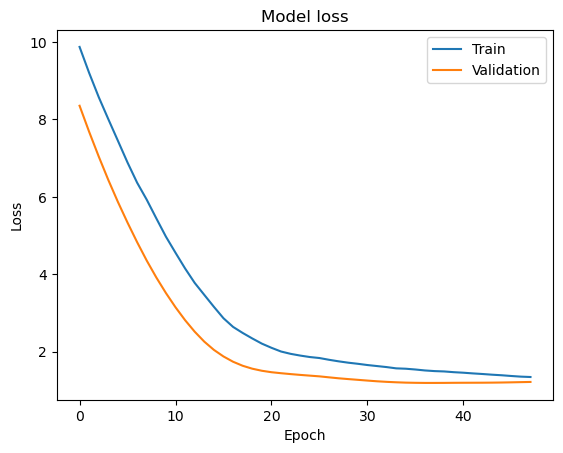

In [26]:
# Shows the model training and testing loss 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

TEST THE MODEL IN NEW DATA

In [27]:
# test this model
import numpy as np

new_data = pd.DataFrame([{
    'total_bill': 20.5,
    'size': 2,
    'sex_Female': False,   # Male
    'smoker_No': True,     # Not a smoker
    'day_Fri': False,
    'day_Sat': True,
    'day_Sun': False,
    'time_Dinner': True

}])

In [28]:
print(new_data)

   total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0        20.5     2       False       True    False     True    False   

   time_Dinner  
0         True  


In [ ]:
# Use the same scaler used in training
new_data_scaled = scaler.transform(new_data) # it can transfrom this data into the numeric form (encode) in the bases of the first fit_transform

In [30]:
print(new_data_scaled)

[[ 2.05000000e+01  2.00000000e+00 -1.66533454e-16  1.00000000e+00
  -1.85037171e-17  1.00000000e+00 -6.01370805e-17  1.00000000e+00]]


In [31]:
predicted_tip = model.predict(new_data_scaled)
print(f"Predicted Tip: ${predicted_tip[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Tip: $28.85
